# Introduction

This Python 3 environment comes with many helpful analytics libraries installed
It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
For example, here's several helpful packages to load

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as pp
from preprocessor import Preprocessor
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df_train: pd.DataFrame = pd.read_csv("./input/train.csv")
df_test: pd.DataFrame = pd.read_csv("./input/test.csv")

df_train.describe()
print(df_train.info())
print(df_train.head(10))
print(df_train.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         

# Preprocessing (siehe Preprocessor)

In [2]:
X_y, X, y = Preprocessor().fit_transform(df_train)
X_np, y_np = X.to_numpy(), y.to_numpy()

X_y.info()
X_y.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          712 non-null    int64  
 1   Pclass            712 non-null    int64  
 2   Age               712 non-null    float64
 3   SibSp             712 non-null    int64  
 4   Parch             712 non-null    int64  
 5   Fare              712 non-null    float64
 6   Deck_cat          712 non-null    int64  
 7   Deck_cat_missing  712 non-null    bool   
 8   Sex_cat           712 non-null    int64  
 9   Embarked_cat      712 non-null    int64  
dtypes: bool(1), float64(2), int64(7)
memory usage: 56.3 KB


,Survived,Pclass,Age,SibSp,Parch,Fare,Deck_cat,Deck_cat_missing,Sex_cat,Embarked_cat
0,0,3,22.0,1,0,7.2500,5,True,1,2
1,1,1,38.0,1,0,71.2833,2,False,0,0
2,1,3,26.0,0,0,7.9250,5,True,0,2
3,1,1,35.0,1,0,53.1000,2,False,0,2
4,0,3,35.0,0,0,8.0500,5,True,1,2
6,0,1,54.0,0,0,51.8625,4,False,1,2
7,0,3,2.0,3,1,21.0750,5,True,1,2
8,1,3,27.0,0,2,11.1333,5,True,0,2
9,1,2,14.0,1,0,30.0708,4,True,0,0
10,1,3,4.0,1,1,16.7000,6,False,0,2


# Korrelations Matrix
Anfangs erkennen zwischen welchen Features hohe  Korrelationen zu erwarten sind und diese sich genauer ansehen

In [3]:
corr_matrix: pd.DataFrame = X_y.corr()
corr_matrix


,Survived,Pclass,Age,SibSp,Parch,Fare,Deck_cat,Deck_cat_missing,Sex_cat,Embarked_cat
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100,-0.309373,-0.320733,-0.536762,-0.181979
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893,0.882576,0.737721,0.150826,0.244145
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,-0.327873,-0.244981,0.099037,-0.032565
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860,0.065327,0.031345,-0.106296,0.033064
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624,0.011983,-0.029509,-0.249543,0.011803
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000,-0.571425,-0.490477,-0.182457,-0.283510
Deck_cat,-0.309373,0.882576,-0.327873,0.065327,0.011983,-0.571425,1.000000,0.688357,0.116326,0.304569
Deck_cat_missing,-0.320733,0.737721,-0.244981,0.031345,-0.029509,-0.490477,0.688357,1.000000,0.143177,0.239361
Sex_cat,-0.536762,0.150826,0.099037,-0.106296,-0.249543,-0.182457,0.116326,0.143177,1.000000,0.109639
Embarked_cat,-0.181979,0.244145,-0.032565,0.033064,0.011803,-0.283510,0.304569,0.239361,0.109639,1.000000


# Categorial plots

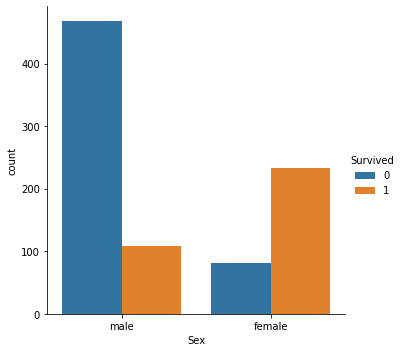

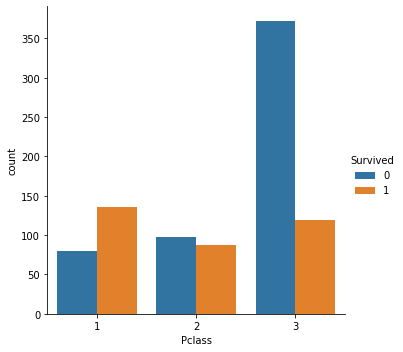

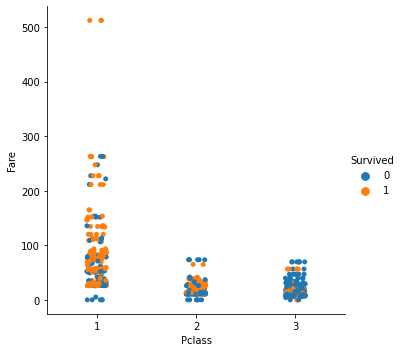

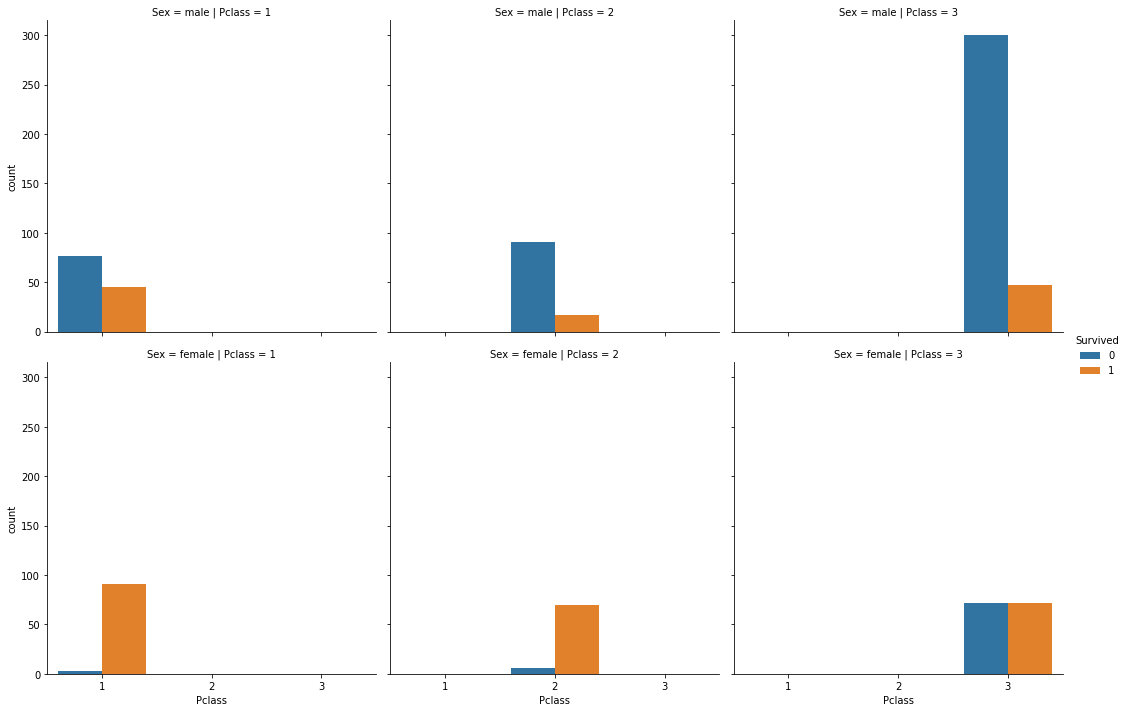

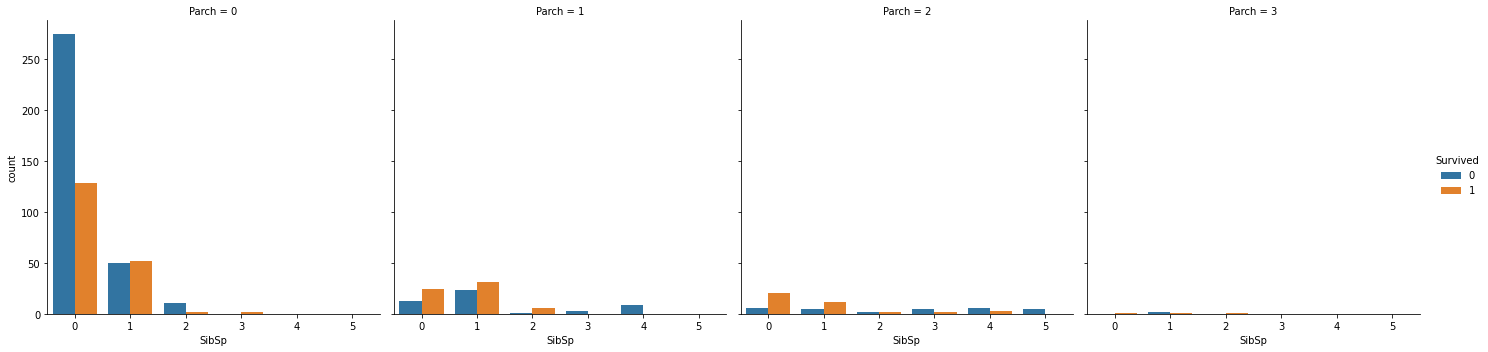

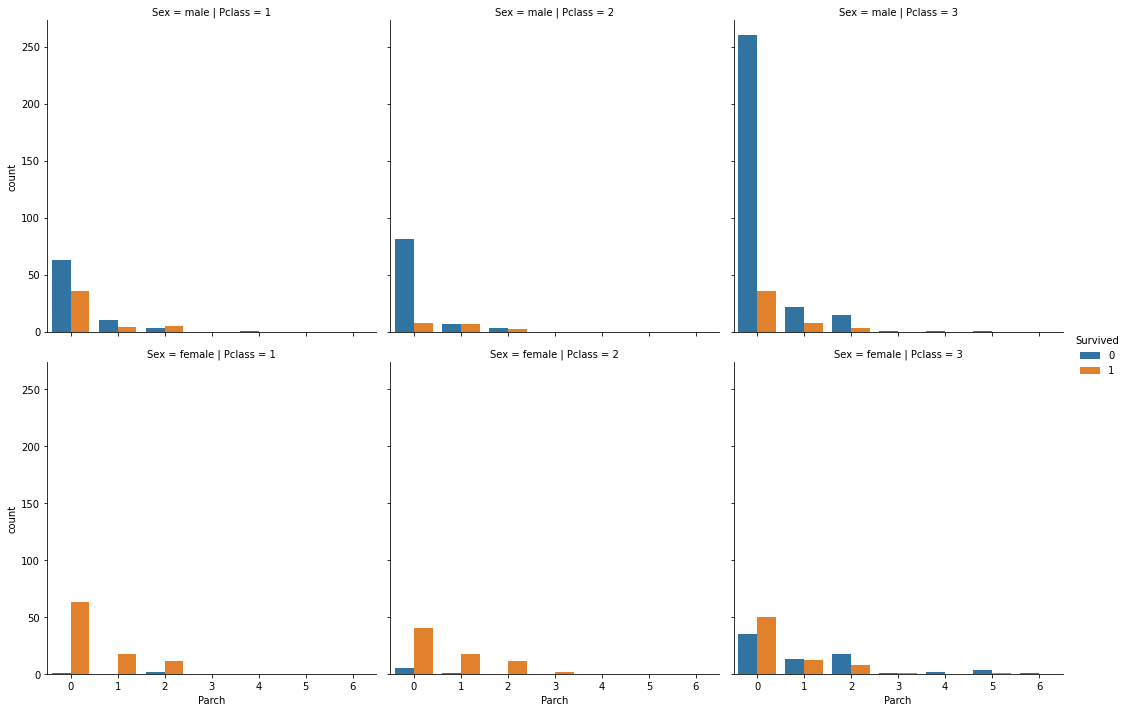

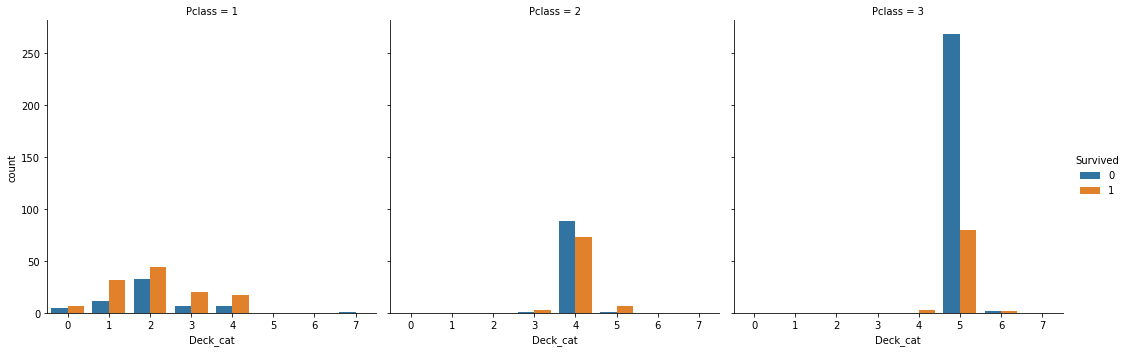

In [4]:
# sns.countplot(x='Sex', hue='Survived', data=df_train)
sns.catplot(x='Sex', hue='Survived', data=df_train, kind='count')
pp.show()
sns.catplot(x='Pclass', hue='Survived', data=df_train, kind='count')
pp.show()
sns.catplot(x='Pclass', hue='Survived', y='Fare', data=df_train)
pp.show()
sns.catplot(x='Pclass', hue='Survived', row='Sex', col='Pclass', data=df_train, kind='count')
pp.show()

sns.catplot(x='SibSp', col='Parch', hue='Survived', data=X_y[X_y["Parch"] < 4], kind='count')
pp.show()

sns.catplot(x='Parch', hue='Survived', row='Sex', col='Pclass', data=df_train, kind='count')
pp.show()

sns.catplot(x='Deck_cat', hue='Survived', col='Pclass', data=X_y, kind='count')
pp.show()

#sns.histplot(x='Age', hue='Survived', data=df_train, binwidth=5.0)
#sns.displot(x='Age', hue='Survived', col='Survived', data=df_train)
#pp.show()

# Distribution plots

## By age

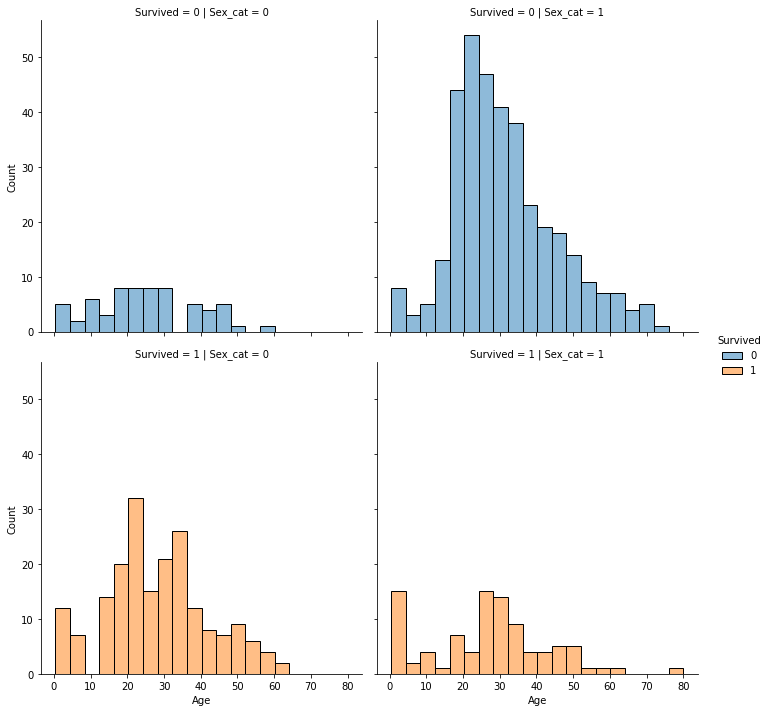

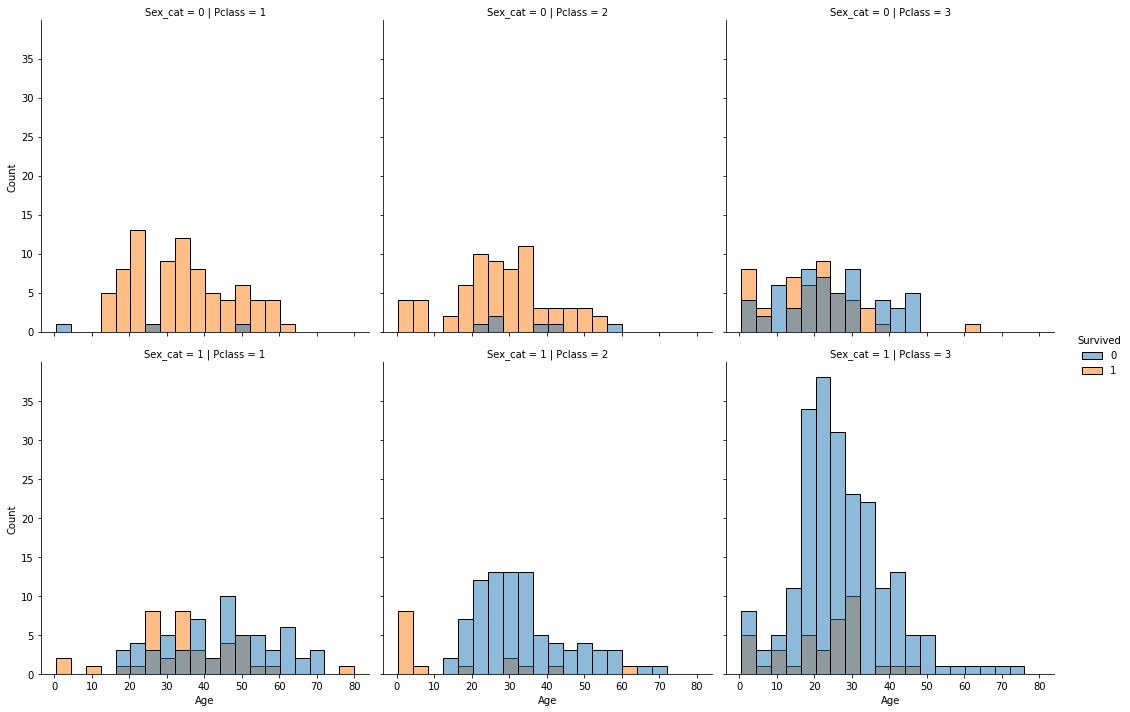

In [5]:
sns.displot(x='Age', hue='Survived', col='Sex_cat', row='Survived', data=X_y)
pp.show()

sns.displot(x='Age', hue='Survived', col='Pclass', row='Sex_cat', data=X_y)
pp.show()

## By fare

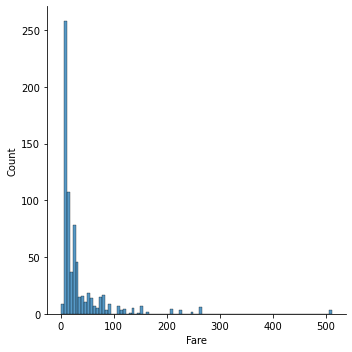

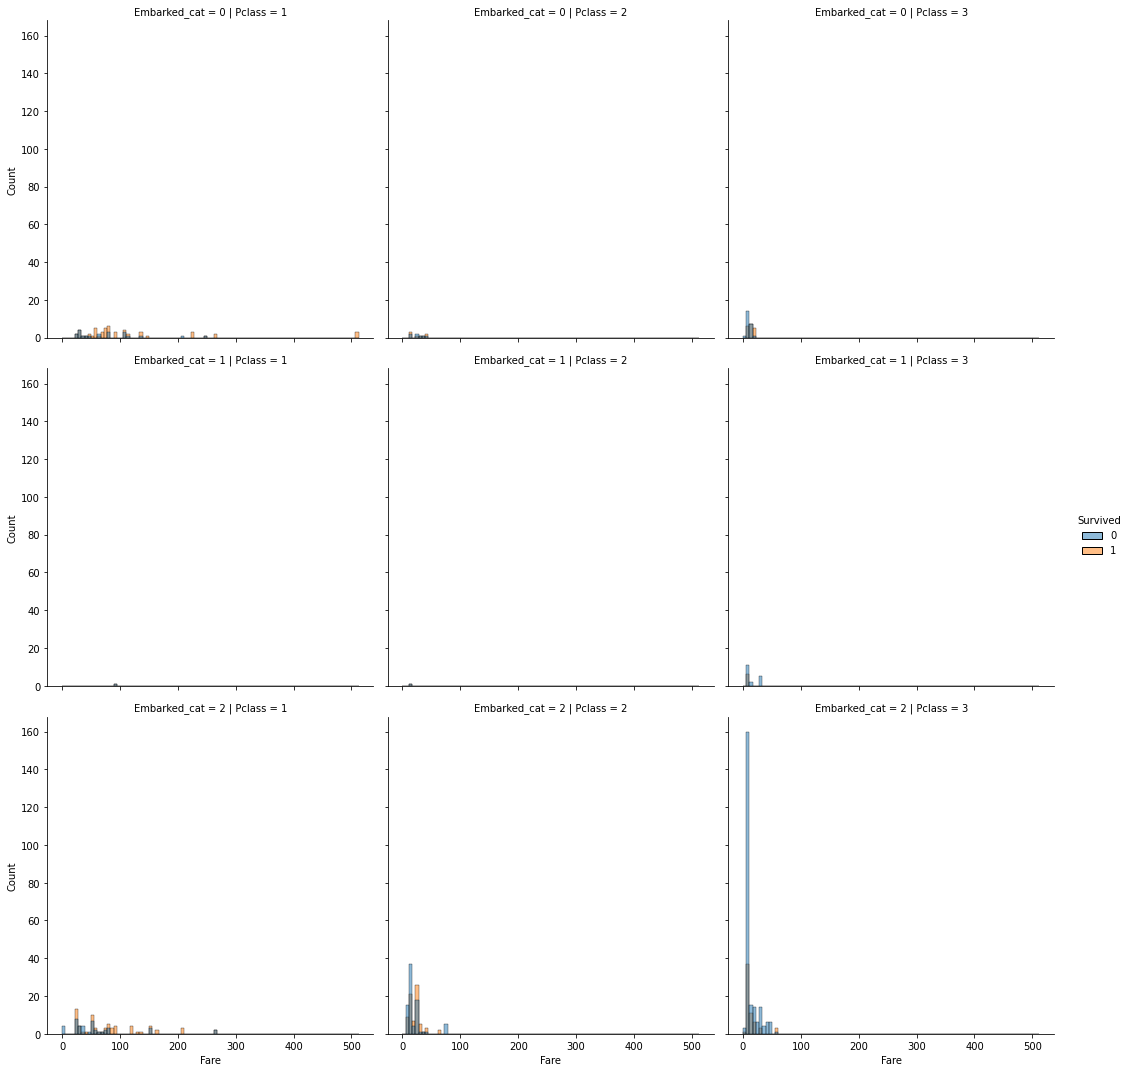

In [6]:
sns.displot(x='Fare', data=X_y)
pp.show()


sns.displot(x='Fare', hue='Survived', col='Pclass', row="Embarked_cat", data=X_y)
pp.show()


In [7]:
# Numeric features: Find pairwise linear dependencies with pair plots in

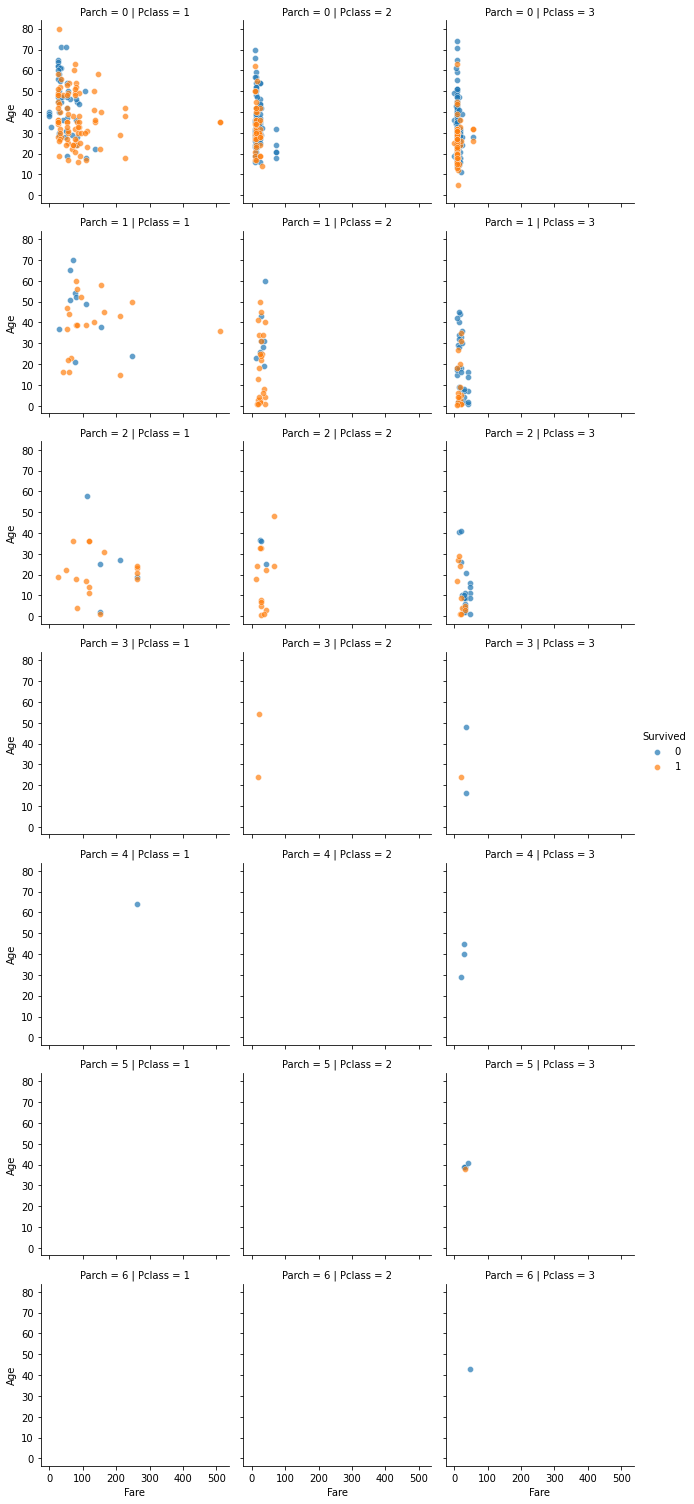

In [8]:
g = sns.FacetGrid(X_y, col="Pclass", row="Parch", hue="Survived")
g.map(sns.scatterplot, "Fare", "Age", alpha=.7)
g.add_legend()


# DecisionTree: Create train and test data from train data set

DecisionTreeClassifier(max_depth=5, max_features=3, random_state=42)

0.7640449438202247

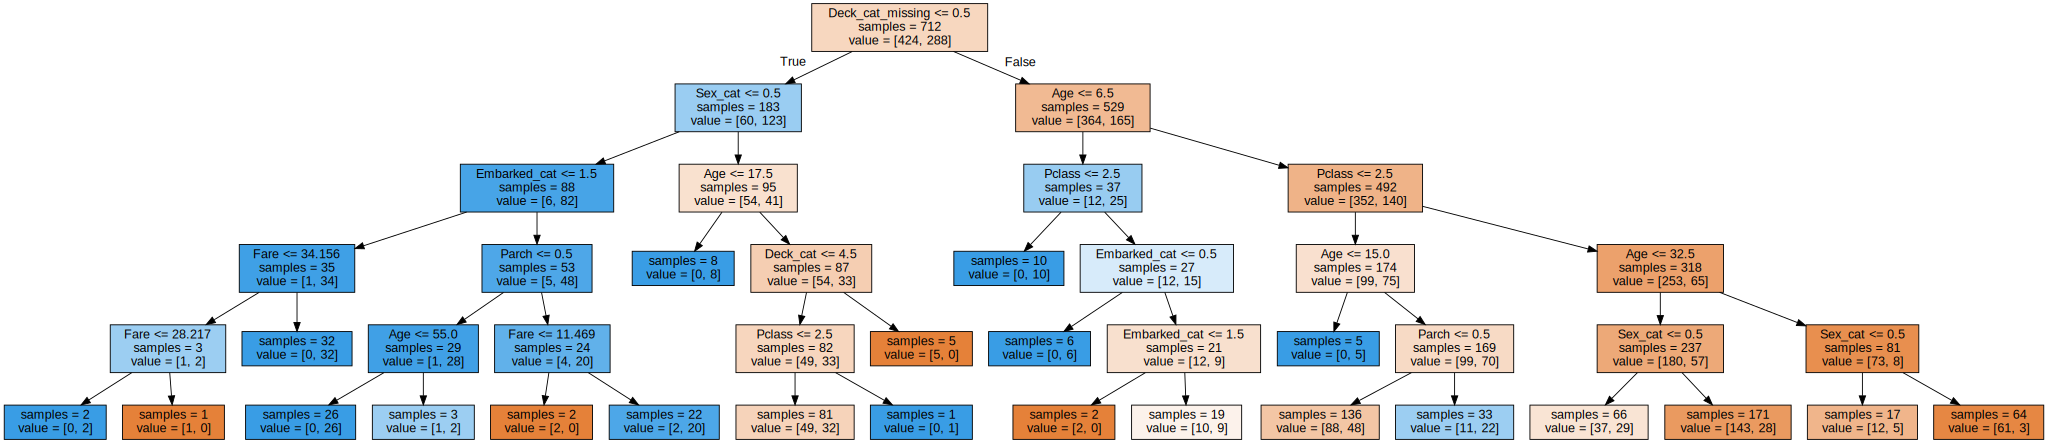

0.7669796557120501

0.04933409159916782

In [26]:
from visu import plot_classifier as plot_clf, plot_clf_file
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score

# drop columns
X_y, X, y = Preprocessor().fit_transform(df_train)
X_np, y_np = X.to_numpy(), y.to_numpy()

clf: DecisionTreeClassifier = DecisionTreeClassifier(random_state=42,
                                                     max_depth=5,
                                                     max_features=3)
clf.fit(X_np, y_np)
clf.score(X_np, y_np)

# plot_clf(clf=clf, feature_names=[i for i in X.columns])
plot_clf_file(clf, feature_names=[c for c in X.columns])

scores = cross_val_score(clf, cv=10, X=X_np, y=y_np, scoring=make_scorer(accuracy_score))
scores.mean()
scores.std()


# RandomForest: Create train and test data from train data set

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

X_y, X, y = Preprocessor().fit_transform(df_train)

X_np, y_np = X.to_numpy(), y.to_numpy()

n_max_features = int(np.sqrt(X.columns.size))
clf = RandomForestClassifier(n_estimators=1000, max_features=n_max_features, random_state=42, min_samples_split=2)
clf.fit(X_np, y_np).score(X_np, y_np)

scores = cross_val_score(clf, cv=5, X=X_np, y=y_np, scoring=make_scorer(accuracy_score))
scores.mean()
scores.std()

0.9901685393258427

0.7837978922485964

0.05350619665437143